# Believing cojunctions - simulation

Setting parameters:

In [1]:
import numpy as np 
threshold = 0.5
max_con_size = 5
loops = 50
cj_nr = 5000
pr_nr = 10000
#simulations = [1001,101,11,7,5,3]
simulations = [1001,101,51,21,15,11,9,7,5,3]

In [2]:
## rounds 'value' according to the 0-1 scale with 'nr' of levels
def round_to_lev(value, nr):
    if (nr == 1001):
        return round(value,3)
    if (nr == 101):
        return round(value,2)
    if (value == 1):
        return 1
    if (value == 0):
        return 0
    diff = 1 / (nr-2)
    err = 1 
    level = diff/2
    result = 0
    for _ in range(nr-2):
        if (abs(value-level)<err):
            err = abs(value-level)
            result = level
        level += diff
    return result

Creating random conjunctions out of propositions, counting those that are above the threshold and comparing the results for different accuracies.

In [3]:
def simulate(levels, prop, cj_nr=5000):
    n = len(levels) 
    mistaken_bel = [0]*n #list with nr of wrongly believed conjunctions 
    mistaken_not_bel = [0]*n #list with nr of conjunctions that should be believed but aren't 
    believed_conj = 0
    for _ in range(cj_nr):
        c_size = np.random.randint(2,max_con_size) #each conjunction has random amount of conjuncts
        c_prop = np.random.randint(0,pr_nr,c_size) #selecting random propositions
        conj_pr = [1]*n
        conj_float = 1        
        for i in c_prop:
            conj_float *= propositions[i]
            for j in range(n):
                #conj_pr[j] = round_to_lev(conj_pr[j]*round_to_lev(propositions[i],levels[j]),levels[j])
                conj_pr[j] *= round_to_lev(propositions[i],levels[j])
        #threshold = np.random.rand()*0.5+0.5
        justified = False
        if (conj_float > threshold):
                believed_conj +=1
                justified = True
        for i in range(n):
            c = conj_pr[i]
            if ((c > round_to_lev(threshold,levels[i])) & (not justified)):
                mistaken_bel[i]+=1
            if ((c <= round_to_lev(threshold,levels[i])) & justified):
                mistaken_not_bel[i]+=1 
    return (mistaken_bel, mistaken_not_bel, believed_conj)

Performing simulation:

In [4]:
results_b = []
results_nb = []
bel_conj_nr=0

for _ in range(loops):    
    propositions = np.random.random(pr_nr)*(1-threshold)+threshold
    (mist_b, mist_nb, believed_conj) = simulate(simulations, propositions, cj_nr)
    results_b.append(mist_b)
    results_nb.append(mist_nb)
    bel_conj_nr += believed_conj
bel_conj_nr /= loops

Counting mistaken beliefs:

In [5]:
error_b, error_nb = [], []
for i in range(len(simulations)):
    b_avg, nb_avg = 0, 0
    for r in results_b:
        b_avg+=r[i]
    for r in results_nb:
        nb_avg+=r[i]
    b_avg/=len(results_b)  
    nb_avg/=len(results_nb) 
    error_b.append(b_avg)
    error_nb.append(nb_avg)

print("Conjunctions:",cj_nr)    
print("Conjunctions above the threshold:", bel_conj_nr)    
print("\nMistaken beliefs:")
for s in range(len(simulations)):
    print("believed:",error_b[s],"| not believed:",error_nb[s],"| error rate:",
          round((error_b[s]+error_nb[s])/cj_nr*100,2),"%","| levels: ",simulations[s])

Conjunctions: 5000
Conjunctions above the threshold: 1605.06

Mistaken beliefs:
believed: 1.22 | not believed: 1.18 | error rate: 0.05 % | levels:  1001
believed: 11.94 | not believed: 11.66 | error rate: 0.47 % | levels:  101
believed: 23.96 | not believed: 23.88 | error rate: 0.96 % | levels:  51
believed: 62.18 | not believed: 69.2 | error rate: 2.63 % | levels:  21
believed: 96.72 | not believed: 77.72 | error rate: 3.49 % | levels:  15
believed: 145.62 | not believed: 126.46 | error rate: 5.44 % | levels:  11
believed: 193.16 | not believed: 160.32 | error rate: 7.07 % | levels:  9
believed: 142.2 | not believed: 318.98 | error rate: 9.22 % | levels:  7
believed: 156.02 | not believed: 531.92 | error rate: 13.76 % | levels:  5
believed: 0.0 | not believed: 1605.06 | error rate: 32.1 % | levels:  3


In [6]:
import matplotlib.pyplot as plt
total_error = np.array(error_b)+np.array(error_nb)
plt.plot(simulations, total_error)
plt.xlabel('accuracy levels')
plt.ylabel('mistaken beliefs')
plt.title('Rounding errors')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

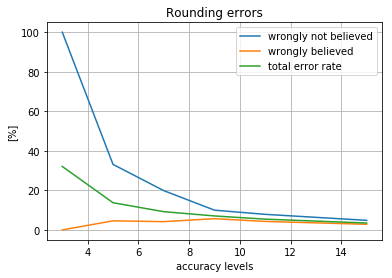

In [7]:
error_rate = np.array(error_nb) / bel_conj_nr * 100
plt.plot(simulations[4:10], error_rate[4:10])
error_rate = np.array(error_b) / (cj_nr-bel_conj_nr) * 100
plt.plot(simulations[4:10], error_rate[4:10])
error_rate = total_error / cj_nr * 100
plt.plot(simulations[4:10], error_rate[4:10])
plt.grid(True)
plt.xlabel('accuracy levels')
plt.ylabel('[%]')
plt.legend(['wrongly not believed', 'wrongly believed','total error rate'])
plt.title('Rounding errors')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

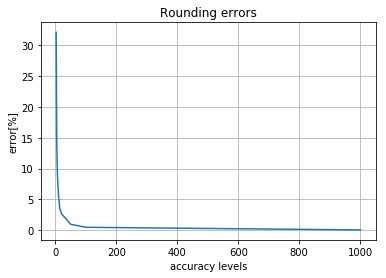

In [8]:
# error_rate = np.array(error_nb) / bel_conj_nr * 100
# plt.plot(simulations, error_rate)
# error_rate = np.array(error_b) / (cj_nr-bel_conj_nr) * 100
# plt.plot(simulations, error_rate)
error_rate = total_error / cj_nr * 100
plt.plot(simulations, error_rate)
plt.grid(True)
plt.xlabel('accuracy levels')
plt.ylabel('error[%]')
#plt.legend(['wrongly not believed', 'wrongly believed','total error rate'])
plt.title('Rounding errors')
plt.show